Column names in the dataset:
Index(['soil_quality', 'rainfall', 'seed_type', 'yield_category'], dtype='object')

First 5 rows of data:
   soil_quality    rainfall seed_type yield_category
0      5.787214  376.596391         C            low
1      2.222101  787.223810         A            low
2      1.893720  810.077116         A         medium
3      2.879777  943.405918         C         medium
4      9.330736  224.439566         C         medium

Accuracy: 0.45
Precision: 0.42777777777777776
Recall: 0.45


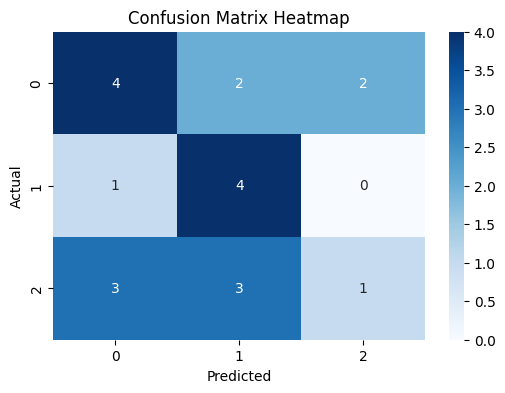

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('/content/crop_yield.csv')

# Show first few rows and column names
print("Column names in the dataset:")
print(data.columns)
print("\nFirst 5 rows of data:")
print(data.head())

# Encode categorical features (like seed type or text labels)
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Split data into features and target
X = data.drop('yield_category', axis=1)
y = data['yield_category']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest here)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
